## Libraries 📚

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


import plotly.express as px
import matplotlib.pyplot as plt

import missingno as msno
import textwrap


## Our dataset 🧐

In [89]:
tinder_df = pd.read_csv("SpeedDatingData.csv", encoding="latin1")

In [3]:
tinder_df.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       NaN      4  ...   
1    1  1.0       0    1       1     1     10         7       NaN      3  ...   
2    1  1.0       0    1       1     1     10         7       NaN     10  ...   
3    1  1.0       0    1       1     1     10         7       NaN      5  ...   
4    1  1.0       0    1       1     1     10         7       NaN      7  ...   

   attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
1      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
2      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
3      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
4      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   

   fun5_3  amb5_3  
0     NaN     NaN  
1     NaN     NaN  
2     NaN     NaN  
3     NaN     NaN  
4     NaN     NaN  

[5 rows x 195 columns]

In [4]:
tinder_df.shape

(8378, 195)

In [5]:
tinder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [6]:
tinder_df.describe(include="all")

iid           id       gender          idg       condtn  \
count   8378.000000  8377.000000  8378.000000  8378.000000  8378.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     283.675937     8.960248     0.500597    17.327166     1.828837   
std      158.583367     5.491329     0.500029    10.940735     0.376673   
min        1.000000     1.000000     0.000000     1.000000     1.000000   
25%      154.000000     4.000000     0.000000     8.000000     2.000000   
50%      281.000000     8.000000     1.000000    16.000000     2.000000   
75%      407.000000    13.000000     1.000000    26.000000     2.000000   
max      552.000000    22.000000     1.000000    44.000000     2.000000   

               wave        round     position     positin1        order  ...  \
count   8378.000000  8378.000000  8378.000000  6532.000000  8378.000000  ...   
unique          NaN          NaN          NaN          NaN          NaN  ...   
top             NaN          NaN          NaN          NaN          NaN  ...   
freq            NaN          NaN          NaN          NaN          NaN  ...   
mean      11.350919    16.872046     9.042731     9.295775     8.927668  ...   
std        5.995903     4.358458     5.514939     5.650199     5.477009  ...   
min        1.000000     5.000000     1.000000     1.000000     1.000000  ...   
25%        7.000000    14.000000     4.000000     4.000000     4.000000  ...   
50%       11.000000    18.000000     8.000000     9.000000     8.000000  ...   
75%       15.000000    20.000000    13.000000    14.000000    13.000000  ...   
max       21.000000    22.000000    22.000000    22.000000    22.000000  ...   

            attr3_3      sinc3_3     intel3_3       fun3_3       amb3_3  \
count   3974.000000  3974.000000  3974.000000  3974.000000  3974.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       7.240312     8.093357     8.388777     7.658782     7.391545   
std        1.576596     1.610309     1.459094     1.744670     1.961417   
min        2.000000     2.000000     3.000000     2.000000     1.000000   
25%        7.000000     7.000000     8.000000     7.000000     6.000000   
50%        7.000000     8.000000     8.000000     8.000000     8.000000   
75%        8.000000     9.000000     9.000000     9.000000     9.000000   
max       12.000000    12.000000    12.000000    12.000000    12.000000   

            attr5_3      sinc5_3     intel5_3       fun5_3       amb5_3  
count   2016.000000  2016.000000  2016.000000  2016.000000  2016.000000  
unique          NaN          NaN          NaN          NaN          NaN  
top             NaN          NaN          NaN          NaN          NaN  
freq            NaN          NaN          NaN          NaN          NaN  
mean       6.810020     7.615079     7.932540     7.155258     7.048611  
std        1.507341     1.504551     1.340868     1.672787     1.717988  
min        2.000000     2.000000     4.000000     1.000000     1.000000  
25%        6.000000     7.000000     7.000000     6.000000     6.000000  
50%        7.000000     8.000000     8.000000     7.000000     7.000000  
75%        8.000000     9.000000     9.000000     8.000000     8.000000  
max       10.000000    10.000000    10.000000    10.000000    10.000000  

[11 rows x 195 columns]

In [7]:
tinder_df.duplicated().sum()

0

In [8]:
tinder_df.isnull().sum().sum()

432016

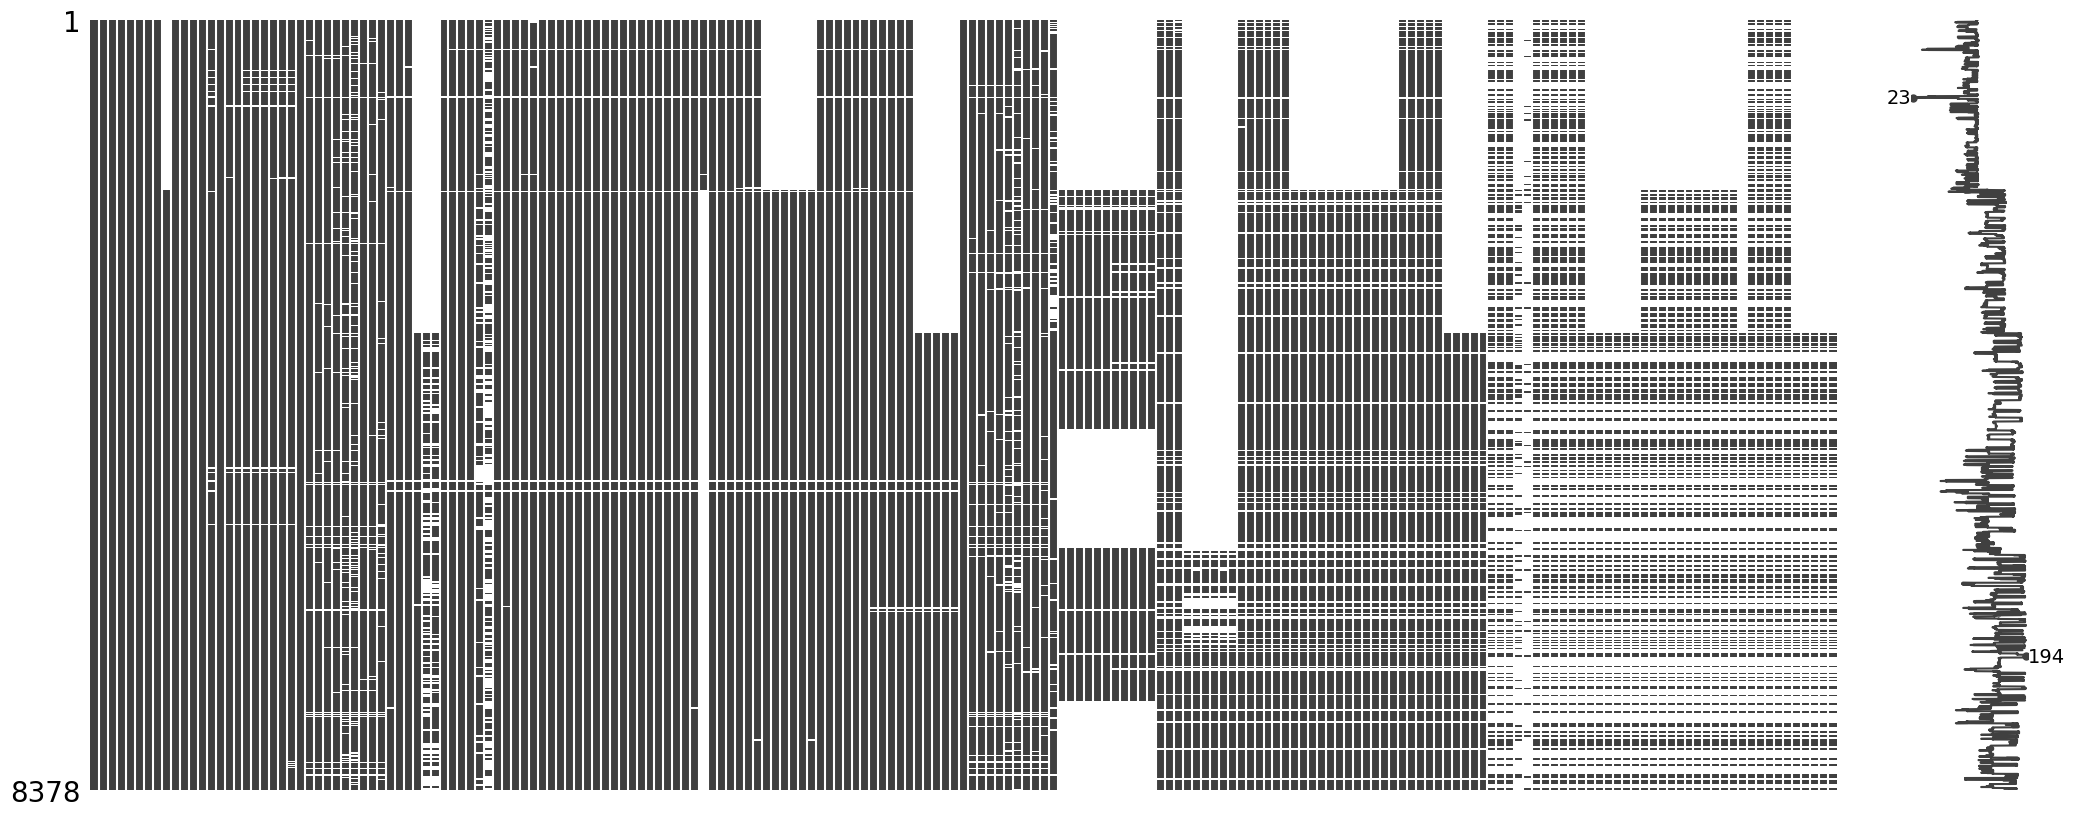

In [9]:
msno.matrix(tinder_df)
plt.show()

In [10]:
# Let's take a look at the missing values per column
missing_values = tinder_df.isnull().sum()
missing_percentage = (missing_values / len(tinder_df)) * 100

missing_data = pd.DataFrame({'Column': tinder_df.columns, 'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data.sort_values(by='Percentage', ascending=False)

print(missing_data)


            Column  Missing Values  Percentage
num_in_3  num_in_3            7710   92.026737
numdat_3  numdat_3            6882   82.143710
expnum      expnum            6578   78.515159
sinc7_2    sinc7_2            6423   76.665075
amb7_2      amb7_2            6423   76.665075
...            ...             ...         ...
wave          wave               0    0.000000
condtn      condtn               0    0.000000
idg            idg               0    0.000000
gender      gender               0    0.000000
dec            dec               0    0.000000

[195 rows x 3 columns]


In [11]:
missing_data.head()

Column  Missing Values  Percentage
num_in_3  num_in_3            7710   92.026737
numdat_3  numdat_3            6882   82.143710
expnum      expnum            6578   78.515159
sinc7_2    sinc7_2            6423   76.665075
amb7_2      amb7_2            6423   76.665075

In [12]:
(missing_data["Percentage"]>= 50).value_counts()

Percentage
False    136
True      59
Name: count, dtype: int64

C:\Users\Malika\AppData\Local\Temp\ipykernel_12072\2376585079.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage', y='Column', data=missing_above_50, palette="rocket")


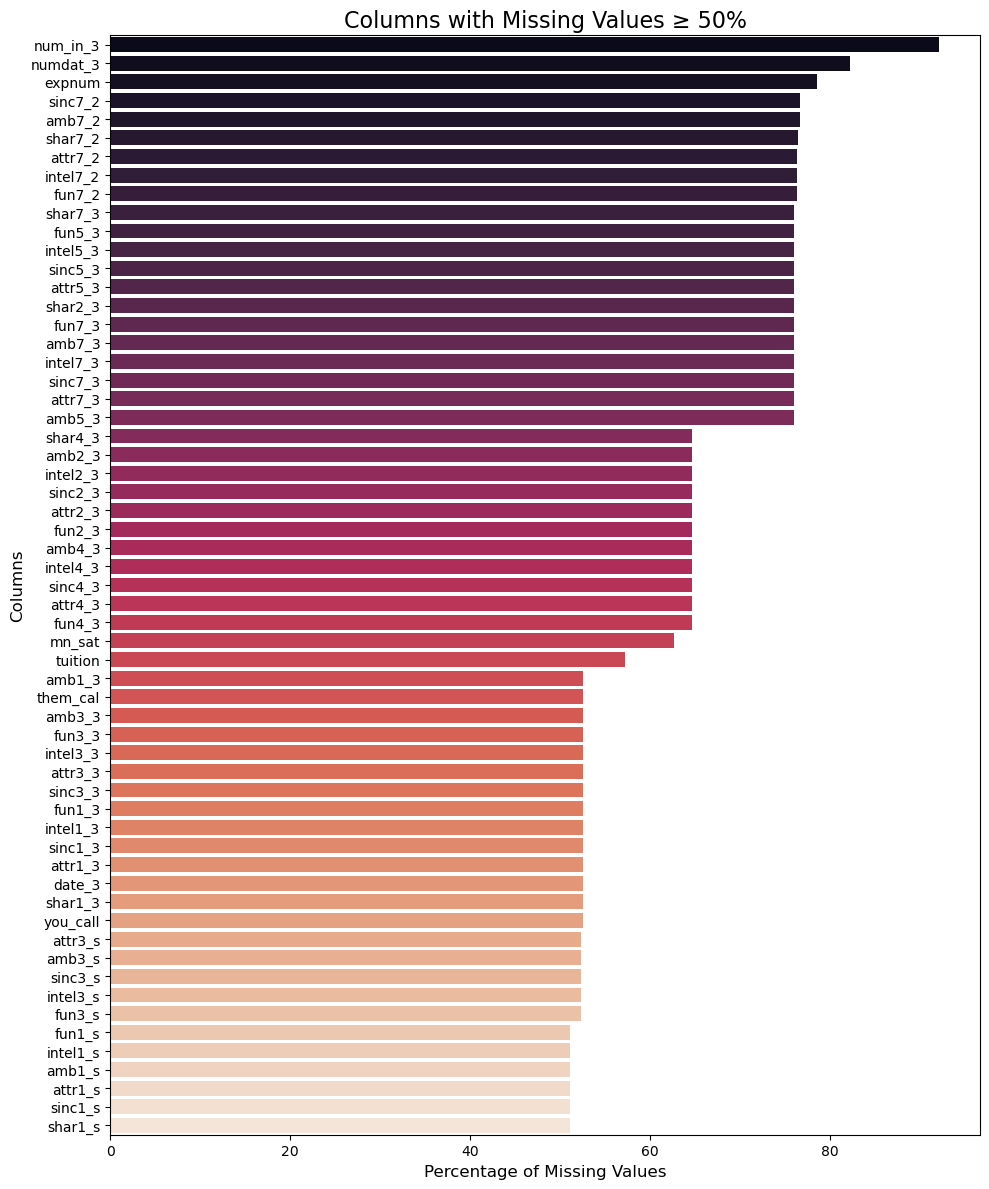

C:\Users\Malika\AppData\Local\Temp\ipykernel_12072\2376585079.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage', y='Column', data=missing_below_50, palette="mako")


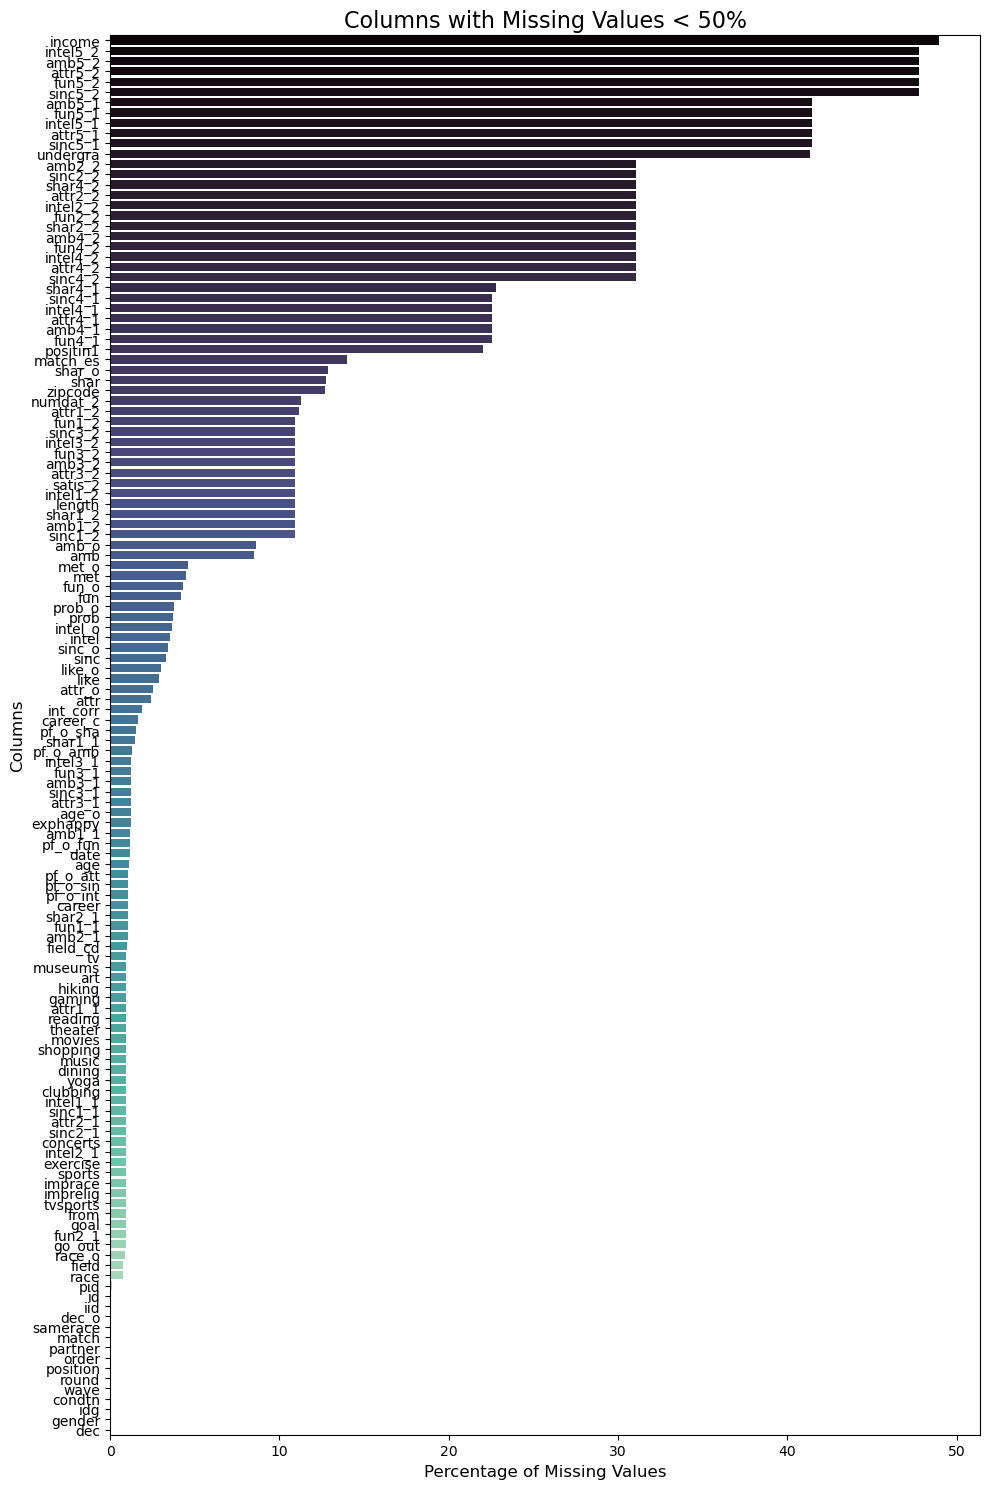

In [13]:
missing_above_50 = missing_data[missing_data['Percentage'] >= 50].sort_values(by='Percentage', ascending=False)
missing_below_50 = missing_data[missing_data['Percentage'] < 50].sort_values(by='Percentage', ascending=False)

plt.figure(figsize=(10, 12)) 
sns.barplot(x='Percentage', y='Column', data=missing_above_50, palette="rocket")
plt.title('Columns with Missing Values ≥ 50%', fontsize=16)
plt.xlabel('Percentage of Missing Values', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 15))  
sns.barplot(x='Percentage', y='Column', data=missing_below_50, palette="mako")
plt.title('Columns with Missing Values < 50%', fontsize=16)
plt.xlabel('Percentage of Missing Values', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.tight_layout()
plt.show()

- We do have a lot of missing values.
- There are forms on a 3 different times (before, during and after the speed dating). missing values increase as it goes by
- No missing value on our target "match".
- For now we choose not to remove data for EDA purpose. we'll make the most if but carefully and in coherent way

## Participants 👩👨

### Gender

In [14]:
# How many participants
tinder_df["iid"].nunique()

551

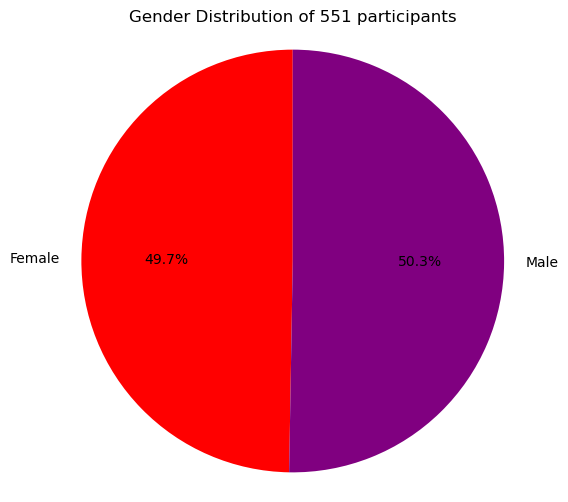

In [15]:
unique_individuals = tinder_df.drop_duplicates(subset='iid')

gender_count = unique_individuals['gender'].value_counts()

gender = {0: 'Female', 1: 'Male'}

labels = [gender[0], gender[1]]
sizes = [gender_count[0], gender_count[1]]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red','purple'])

plt.axis('equal')
plt.title('Gender Distribution of 551 participants')

plt.show()


### Age 🎂

In [16]:
tinder_df['age'].isnull().sum()

95

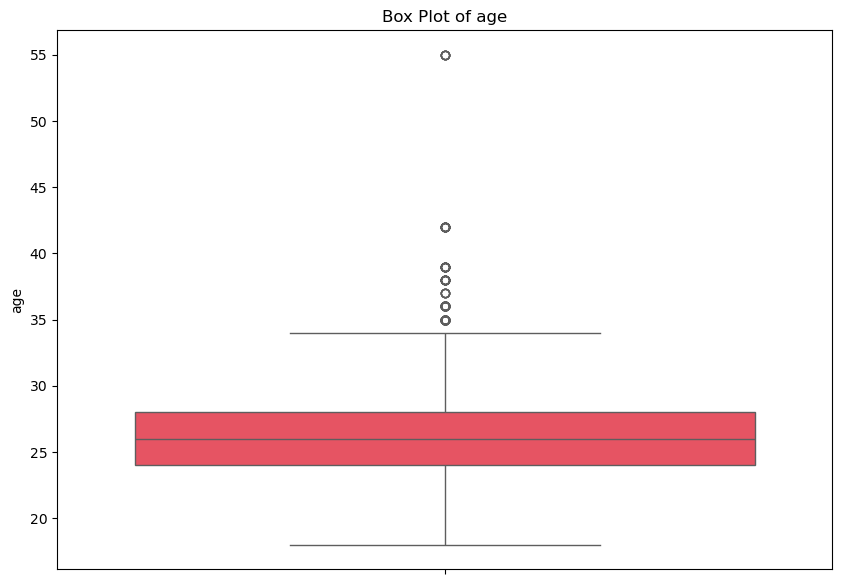

In [17]:
plt.figure(figsize=(10, 7))
columns_to_check = ['age']

for i, column in enumerate(columns_to_check):
    plt.subplot(1, 1, i + 1) 
    sns.boxplot(data=tinder_df, y=column, color="#FE3C50")
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.show()

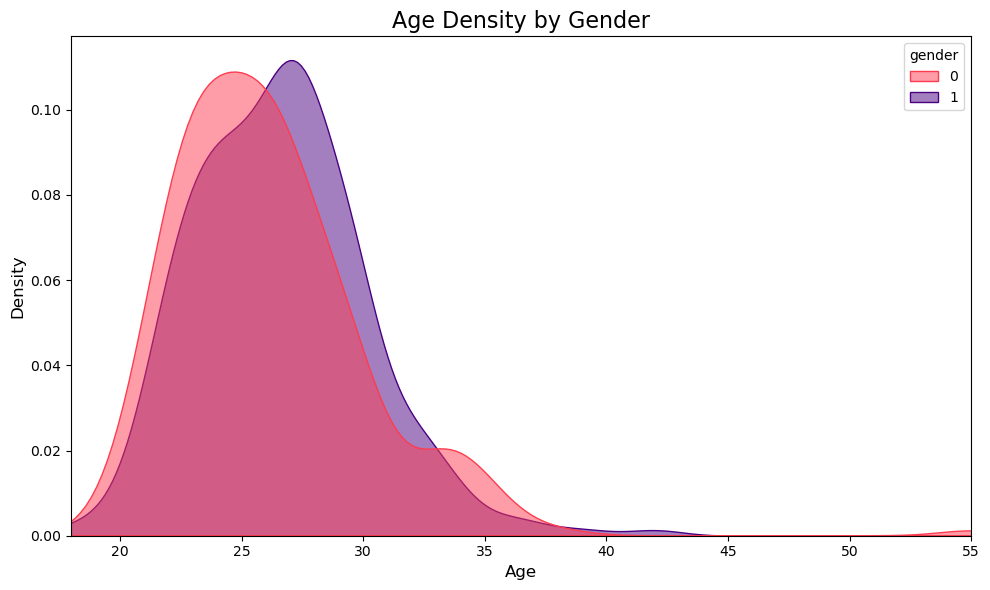

In [18]:
plt.figure(figsize=(10, 6)) 

sns.kdeplot(data=unique_individuals, x='age', hue='gender', fill=True, common_norm=False, 
            palette={0: '#FE3C50', 1: '#4B0082'}, alpha=0.5)

plt.title('Age Density by Gender', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.xlim(unique_individuals['age'].min(), unique_individuals['age'].max())

plt.tight_layout()
plt.show()

- Gender distribution in balanced
- Majority of participants are 20 - 30 years old

### Race 🌍

C:\Users\Malika\AppData\Local\Temp\ipykernel_12072\3433528533.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_individuals['race'] = unique_individuals['race'].map(race)
C:\Users\Malika\AppData\Local\Temp\ipykernel_12072\3433528533.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=unique_individuals, x='race', order=sorted_races, palette="inferno")


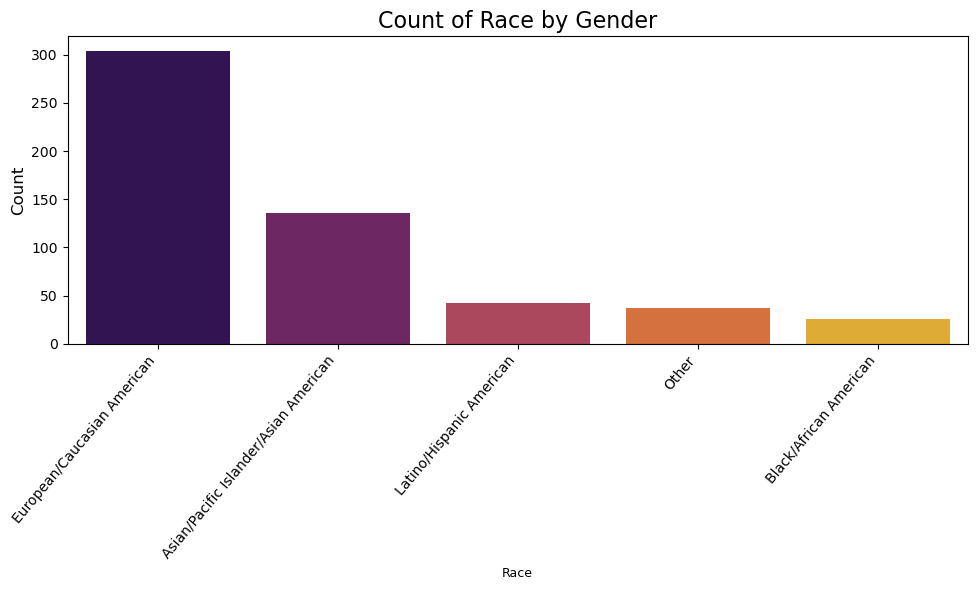

In [19]:
plt.figure(figsize=(10, 6)) 
unique_individuals = tinder_df.drop_duplicates(subset='iid')
race = {
    1: 'Black/African American',
    2: 'European/Caucasian American',
    3: 'Latino/Hispanic American',
    4: 'Asian/Pacific Islander/Asian American',
    5: 'Native American',
    6: 'Other'
}

unique_individuals['race'] = unique_individuals['race'].map(race)
race_counts = unique_individuals['race'].value_counts()
sorted_races = race_counts.index.tolist()

sns.countplot(data=unique_individuals, x='race', order=sorted_races, palette="inferno")

plt.title('Count of Race by Gender', fontsize=16)
plt.xlabel('Race', fontsize=9)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=50, ha='right')

plt.tight_layout()
plt.show()

In [20]:
total_count = race_counts.sum()
race_percentages = ((race_counts / total_count) * 100).round(2)
race_percentages

race
European/Caucasian American              55.78
Asian/Pacific Islander/Asian American    24.95
Latino/Hispanic American                  7.71
Other                                     6.79
Black/African American                    4.77
Name: count, dtype: float64

- we only have 6 missing missing values in "race"
- Large majority of European/Caucasian American 55.78% followed by Asian/Pacific Islander/Asian American 
- Latino/Hispanic American and Black/African American represent a minority

#### Race importance ✨

C:\Users\Malika\AppData\Local\Temp\ipykernel_12072\704587720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_individuals['gender_label'] = unique_individuals['gender'].map({0: 'Female', 1: 'Male'})


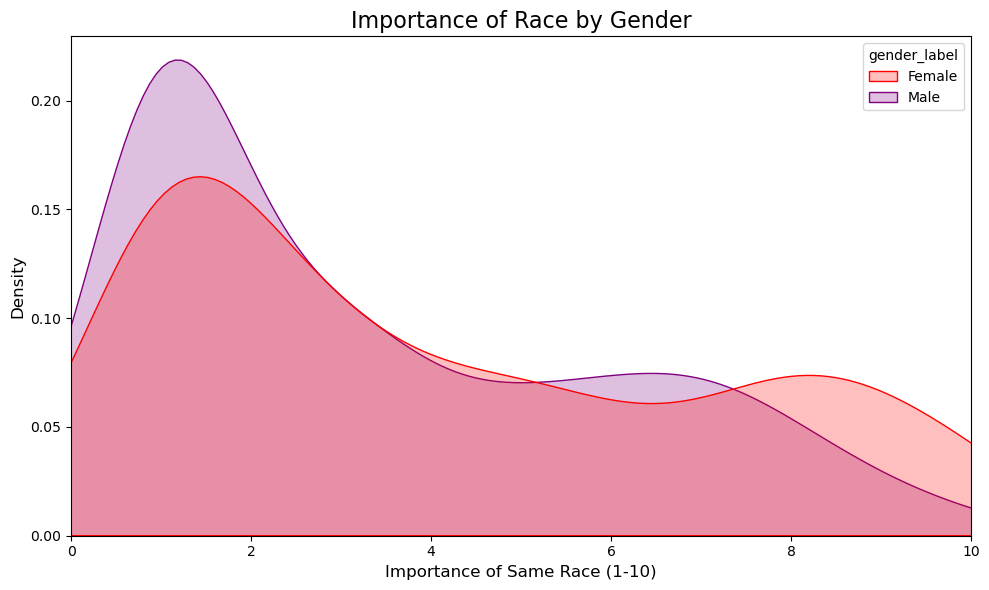

In [100]:
unique_individuals = tinder_df.drop_duplicates(subset='iid')
unique_individuals['gender_label'] = unique_individuals['gender'].map({0: 'Female', 1: 'Male'})

plt.figure(figsize=(10, 6))
sns.kdeplot(data=unique_individuals, x='imprace', hue='gender_label', fill=True, common_norm=False, palette=['red', 'purple'])

plt.title('Importance of Race by Gender', fontsize=16)
plt.xlabel('Importance of Same Race (1-10)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(0,10)

plt.tight_layout()
plt.show()


- For the majority Race is not really important

#### Religion importance ✨

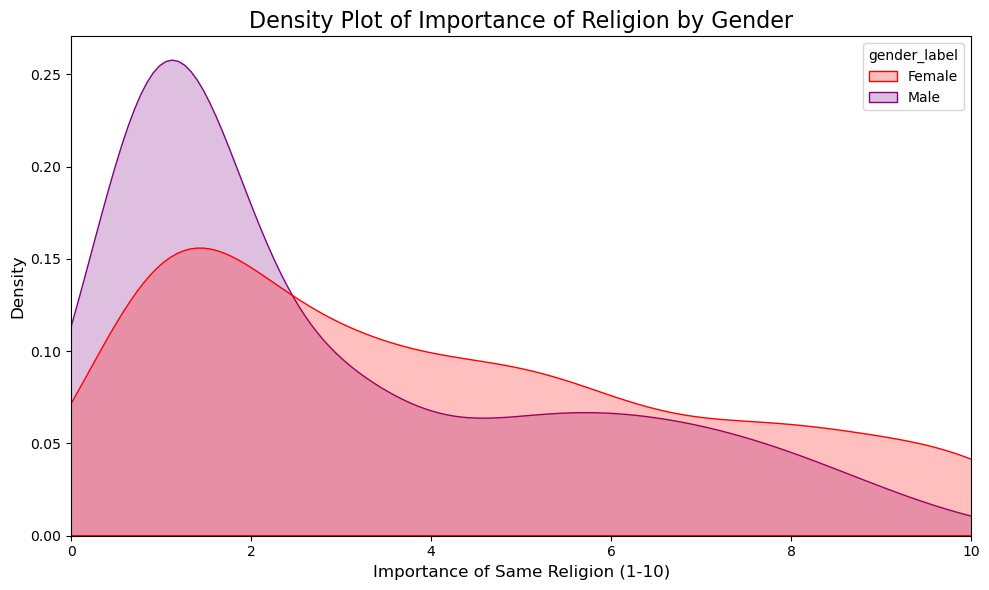

In [101]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=unique_individuals, x='imprelig', hue='gender_label', fill=True, common_norm=False, palette=['red', 'purple'])

plt.title('Density Plot of Importance of Religion by Gender', fontsize=16)
plt.xlabel('Importance of Same Religion (1-10)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(0,10)

plt.tight_layout()
plt.show()

- For the majority Religion is not important

### Carreer 🚀

C:\Users\Malika\AppData\Local\Temp\ipykernel_12072\1422816208.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_individuals['career'] = unique_individuals['career_c'].map(career_mapping)
C:\Users\Malika\AppData\Local\Temp\ipykernel_12072\1422816208.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=unique_individuals, x='career', order=sorted_careers, palette='inferno')
C:\Users\Malika\AppData\Local\Temp\ipykernel_12072\1422816208.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_

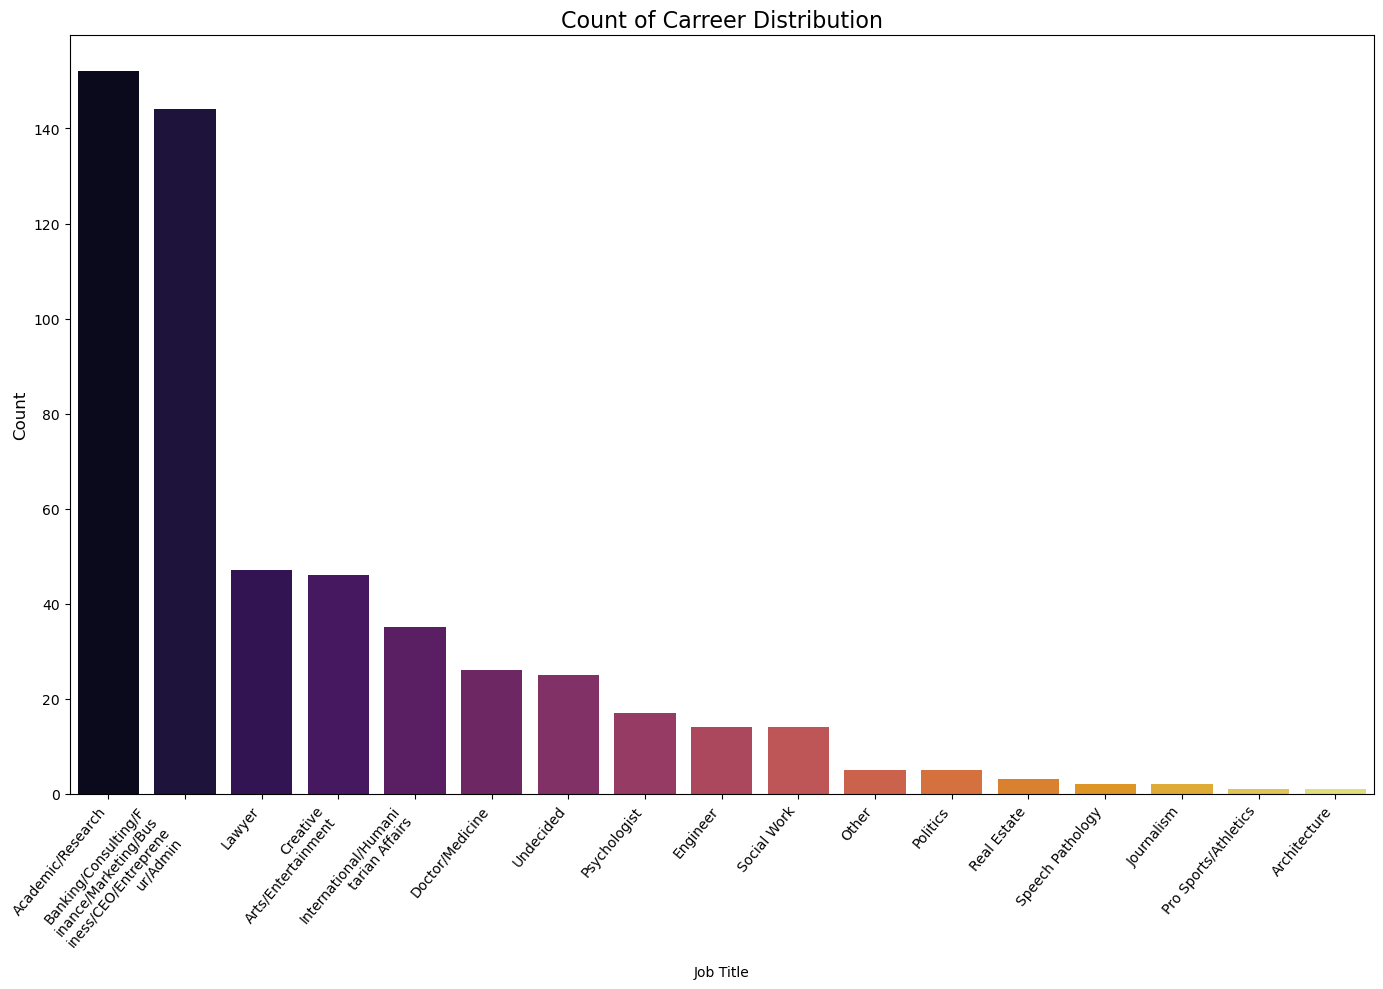

In [23]:
career_mapping = {
    1: 'Lawyer',
    2: 'Academic/Research',
    3: 'Psychologist',
    4: 'Doctor/Medicine',
    5: 'Engineer',
    6: 'Creative Arts/Entertainment',
    7: 'Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin',
    8: 'Real Estate',
    9: 'International/Humanitarian Affairs',
    10: 'Undecided',
    11: 'Social Work',
    12: 'Speech Pathology',
    13: 'Politics',
    14: 'Pro Sports/Athletics',
    15: 'Other',
    16: 'Journalism',
    17: 'Architecture'
}

unique_individuals['career'] = unique_individuals['career_c'].map(career_mapping)

career_counts = unique_individuals['career'].value_counts()
sorted_careers = career_counts.index.tolist()

plt.figure(figsize=(14, 10)) 
sns.countplot(data=unique_individuals, x='career', order=sorted_careers, palette='inferno')

plt.title('Count of Carreer Distribution', fontsize=16)
plt.xlabel('Job Title', fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=50, ha='right')
wrapped_labels = [textwrap.fill(label, 20) for label in sorted_careers]
plt.gca().set_xticklabels(wrapped_labels)
plt.tight_layout()
plt.show()

- Academic/Research and Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin represent large majority (Giver the average age and considering the second field in business / corp generally this is not surprising)

In [24]:
total_count = career_counts.sum()
race_percentages = ((career_counts / total_count) * 100).round(2)
race_percentages

career
Academic/Research                                                       28.20
Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin    26.72
Lawyer                                                                   8.72
Creative Arts/Entertainment                                              8.53
International/Humanitarian Affairs                                       6.49
Doctor/Medicine                                                          4.82
Undecided                                                                4.64
Psychologist                                                             3.15
Engineer                                                                 2.60
Social Work                                                              2.60
Other                                                                    0.93
Politics                                                                 0.93
Real Estate                                              

C:\Users\Malika\AppData\Local\Temp\ipykernel_12072\2037046494.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_individuals['goal_label'] = unique_individuals['goal'].map(goal_labels)


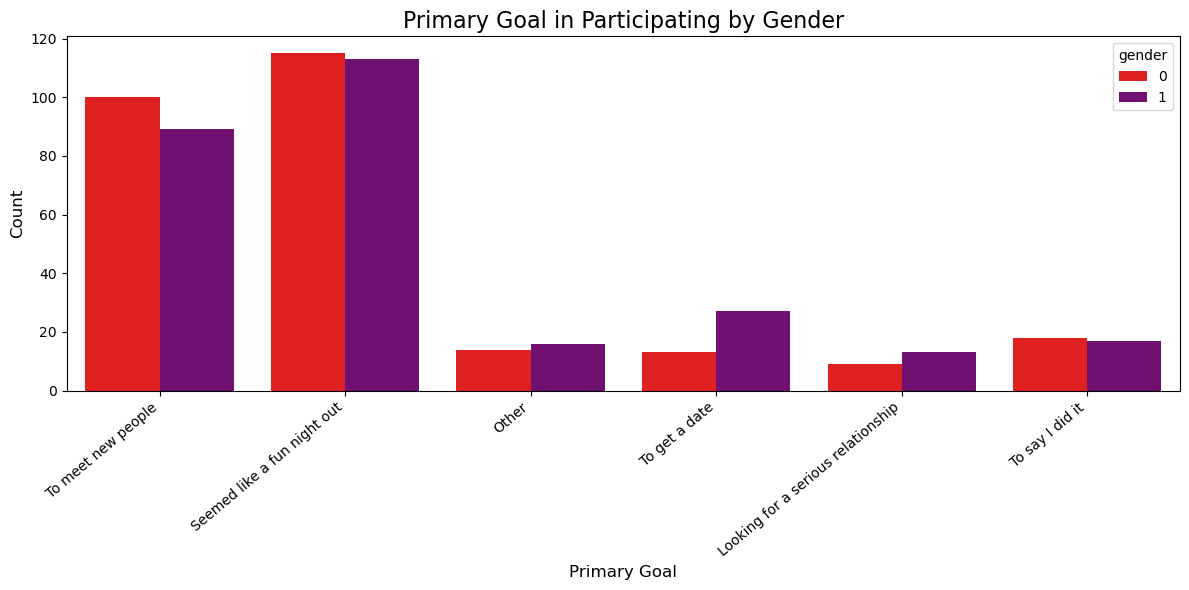

In [27]:
goal_labels = {
    1: 'Seemed like a fun night out',
    2: 'To meet new people',
    3: 'To get a date',
    4: 'Looking for a serious relationship',
    5: 'To say I did it',
    6: 'Other'
}

unique_individuals['goal_label'] = unique_individuals['goal'].map(goal_labels)

plt.figure(figsize=(12, 6))
sns.countplot(data=unique_individuals, x='goal_label', hue='gender', palette=['red', 'purple'])

plt.title('Primary Goal in Participating by Gender', fontsize=16)
plt.xlabel('Primary Goal', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=40, ha= "right")

plt.tight_layout()
plt.show()

- Looks like the majority is looking to meet new poeple and have a fun night out
- It's pretty much balanced between men and women

In [28]:
tinder_df["dec_o"].isnull().sum()

0

In [29]:
tinder_df["dec"].isnull().sum()

0

## Match 💥 or Pass 👎

only one said yes: 51.0%
both said no: 32.53% 


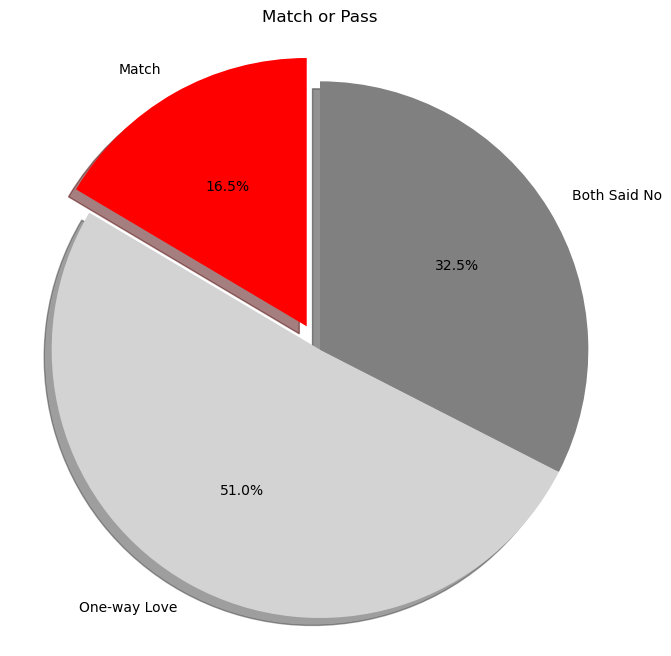

In [30]:
# one-way love?
one_way_l = len(tinder_df[(tinder_df['dec_o'] == 1) & (tinder_df['dec'] == 0)]) + len(tinder_df[(tinder_df['dec_o'] == 0) & (tinder_df['dec'] == 1)])
one_way_l_ratio = round((one_way_l / len(tinder_df) * 100), 2)
print(f"only one said yes: {one_way_l_ratio}%")

# Both said no
no_love = len(tinder_df[(tinder_df['dec_o'] == 0) & (tinder_df['dec'] == 0)])
no_love_ratio = round((no_love / len(tinder_df) * 100), 2)
print(f"both said no: {no_love_ratio}% ")

# Match !! 
mutual_match = len(tinder_df[(tinder_df['dec_o'] == 1) & (tinder_df['dec'] == 1)])

plt.figure(figsize=(8, 8))
labels = ['Match', 'One-way Love', 'Both Said No']
sizes = [mutual_match, one_way_l, no_love]
colors = ['red', 'lightgrey', 'grey']
explode = (0.1, 0, 0)

patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)

plt.title('Match or Pass')
plt.axis('equal')

plt.show()


- Pretty low rate of match
- 51% one out of two poeple swiped right which represents half of the exeperience amount! this area is defenetly interesting to explore

#### Connexions 🤙

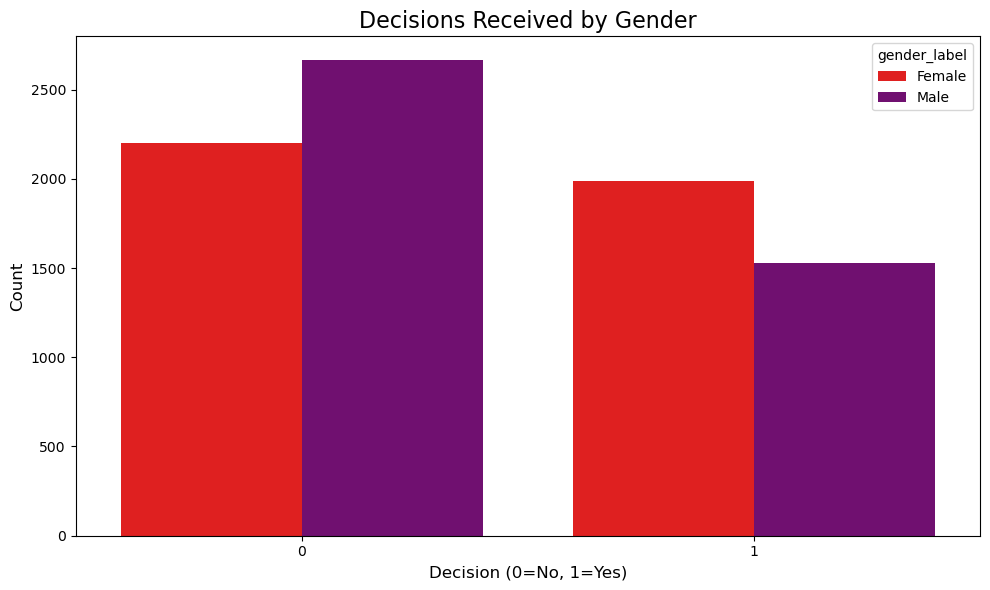

In [31]:
# Let's take a look at decicion recieved by gender 
tinder_df['gender_label'] = tinder_df['gender'].map({0: 'Female', 1: 'Male'})
plt.figure(figsize=(10, 6))

sns.countplot(data=tinder_df, x='dec_o', hue='gender_label', palette=['red', 'purple'])

plt.title('Decisions Received by Gender', fontsize=16)
plt.xlabel('Decision (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

- Men recieved more negative answers and less positive answers than women which indicates that men tend to be more rejected :(
- Better balance between yes and no for women
- overall poeple tend to say "no" more often than yes

#### What's good for a potential date? 📈

In [ ]:
# Let's normalize the scale of waves rating so that all represent 100 point distributio
waves_6_to_9 = tinder_df[(tinder_df['wave'] >= 6) & (tinder_df['wave'] <= 9)]
waves_1_5_10_21 = tinder_df[(tinder_df['wave'] <= 5) | (tinder_df['wave'] >= 10)]

attributes = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
              'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']

attributes_self = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
attributes_opposite = ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']

waves_6_to_9[attributes_self] = waves_6_to_9[attributes_self].div(waves_6_to_9[attributes_self].sum(axis=1), axis=0) * 100
waves_6_to_9[attributes_opposite] = waves_6_to_9[attributes_opposite].div(waves_6_to_9[attributes_opposite].sum(axis=1), axis=0) * 100

tinder_df_scaled = pd.concat([waves_6_to_9, waves_1_5_10_21])

In [54]:
tinder_df[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1','attr2_1',
           'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].isnull().sum() / len(tinder_df)

attr1_1     0.009429
sinc1_1     0.009429
intel1_1    0.009429
fun1_1      0.010623
amb1_1      0.011817
shar1_1     0.014443
attr2_1     0.009429
sinc2_1     0.009429
intel2_1    0.009429
fun2_1      0.009429
amb2_1      0.010623
shar2_1     0.010623
dtype: float64

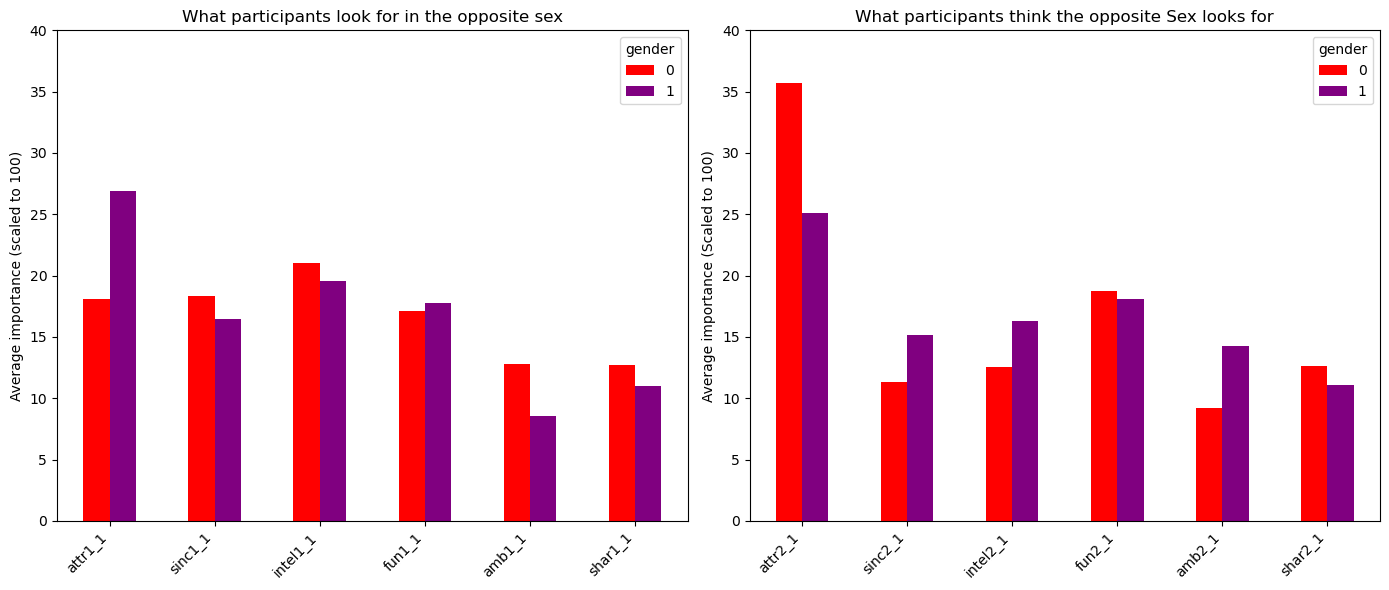

In [42]:

tinder_df_scaled[attributes] = tinder_df_scaled[attributes].apply(pd.to_numeric, errors='coerce')
grouped_waves = tinder_df_scaled.groupby('gender')[attributes].mean()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

grouped_waves[attributes_self].T.plot(kind='bar', ax=plt.gca(), color=['red', 'purple'])
plt.title('What participants look for in the opposite sex')
plt.ylabel('Average importance (scaled to 100)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0,40)

plt.subplot(1, 2, 2)
grouped_waves[attributes_opposite].T.plot(kind='bar', ax=plt.gca(), color=['red', 'purple'])
plt.title('What participants think the opposite Sex looks for')
plt.ylabel('Average importance (Scaled to 100)')
plt.xticks(rotation=45,  ha='right')
plt.ylim(0,40)

plt.tight_layout()
plt.show()


In [43]:
grouped_waves.round(2)

attr1_1  sinc1_1  intel1_1  fun1_1  amb1_1  shar1_1  attr2_1  sinc2_1  \
gender                                                                          
0         18.06     18.3     21.00   17.15   12.83     12.7    35.69    11.34   
1         26.92     16.5     19.54   17.76    8.55     11.0    25.09    15.18   

        intel2_1  fun2_1  amb2_1  shar2_1  
gender                                     
0          12.53   18.73    9.23    12.65  
1          16.28   18.12   14.23    11.07

- Women have a high preference for intelligence and sincerity. Attractivness and fun follow 
- Men have a high preference for attractiveness. intelligence, sencirity and fun have a moderate importance. Not much importance for ambition and shared interest

- Women think that men have preference for attractiveness (they are not wrong! but they overestimated it). Men give more importance to intelligence and sincirity than women think they do. 
- Men think that women give importance to atractivness the most and they are wrong. Then Intelligence 

Conclusion: 
- there is a gap between what they think the opposite sex want and it actually wants (they need a better communication!)
- men and women dont give the same importance to the attributes 

####  Attractiveness: Can people accurately predict their own perceived value in the dating market? 🤳👀

In [44]:
missing_values = tinder_df[['attr5_1', 'attr_o', 'gender']].isnull().sum()
print("Missing values:\n", missing_values)
tinder_df_clean = tinder_df.dropna(subset=['attr5_1', 'attr_o'])
print(tinder_df_clean[['attr5_1', 'attr_o']].describe())

Missing values:
 attr5_1    3472
attr_o      212
gender        0
dtype: int64
           attr5_1       attr_o
count  4740.000000  4740.000000
mean      6.937975     6.144283
std       1.500071     1.936289
min       2.000000     0.000000
25%       6.000000     5.000000
50%       7.000000     6.000000
75%       8.000000     7.000000
max      10.000000    10.500000


In [45]:
tinder_df_clean['difference'] = tinder_df_clean['attr5_1'] - tinder_df_clean['attr_o']
print(tinder_df_clean[['attr5_1', 'attr_o', 'difference']].head())

      attr5_1  attr_o  difference
3408      9.0     6.0         3.0
3409      9.0     6.0         3.0
3410      9.0     8.0         1.0
3411      9.0     3.0         6.0
3412      9.0     3.0         6.0


C:\Users\Malika\AppData\Local\Temp\ipykernel_12072\1096806834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tinder_df_clean['difference'] = tinder_df_clean['attr5_1'] - tinder_df_clean['attr_o']


In [46]:
# mean difference

for gender in tinder_df_clean['gender'].unique():
    mean_difference = tinder_df_clean[tinder_df_clean['gender'] == gender]['difference'].mean()
    print(f"Gender {gender} - Mean difference (self-rating - partner rating): {mean_difference}")


Gender 0 - Mean difference (self-rating - partner rating): 0.6751155947877259
Gender 1 - Mean difference (self-rating - partner rating): 0.9131723845828039


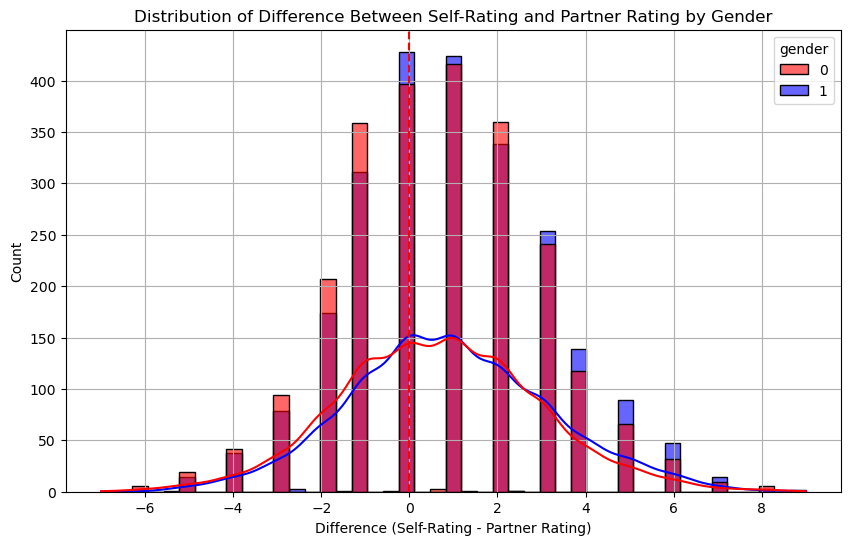

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data=tinder_df_clean, x='difference', hue='gender', kde=True, palette={0: 'red', 1: 'blue'}, alpha=0.6)
plt.title('Distribution of Difference Between Self-Rating and Partner Rating by Gender')
plt.xlabel('Difference (Self-Rating - Partner Rating)')
plt.ylabel('Count')
plt.axvline(0, color='red', linestyle='--')  #( self-rating = partner rating)
plt.grid()
plt.show()


Observations: 
- Both women and men tend to rate themselves more attractive that others actually prcieve them
- Men tend to rate themselve evenmore attractive than women do
- Overall there is a normal distribution which suggest that the majority is not far from "reality" but still poeple tend to overate themselves a little bit 
- Regarding poeple who underrate themselves, women tend to underrate themselves more than men do

### Features influence on success ✨

In [48]:
corr = tinder_df.corrwith(tinder_df["match"], numeric_only=True)
results = pd.DataFrame(corr, columns=['Correlation'])
results.sort_values(by="Correlation", ascending=False).head(15)

Correlation
match        1.000000
dec_o        0.522326
dec          0.521943
like_o       0.305853
like         0.305723
fun_o        0.277700
fun          0.277545
shar_o       0.270840
shar         0.270679
attr_o       0.260837
attr         0.260676
prob_o       0.255574
prob         0.255531
them_cal     0.202762
intel        0.169532

C:\Users\Malika\AppData\Local\Temp\ipykernel_12072\3279357183.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr['Correlation'], y=top_corr.index, palette='inferno')


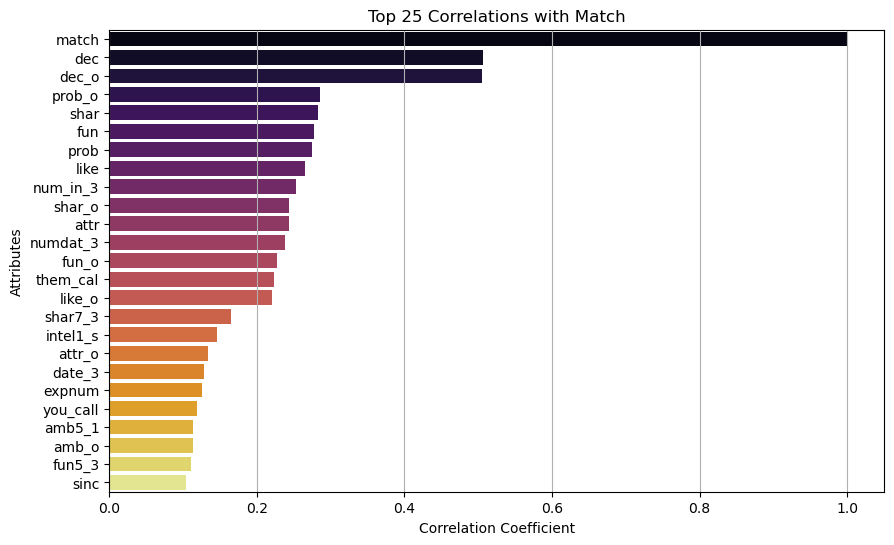

In [108]:
top_corr = results.sort_values(by="Correlation", ascending=False).head(25)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr['Correlation'], y=top_corr.index, palette='inferno')

plt.title('Top 25 Correlations with Match')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Attributes')
plt.grid(axis='x')

plt.show()

Observations:
- Of course "swiping right" get you halfway to match. Let's see what other factors influence the match. Liking eachother has big influence as well (makes sense!)
- Seems like having fun and sharing the same interst/hobbies have a big importance. Not a suprise in real life but considering the results of "what they are looking for in the opposite sex", sharing the same interests has more important than they think it has!
- Attractiveness is also a good influencer to get a match, which validates poeple's answers regarding what they look for


In [113]:
corr_date = tinder_df.corrwith(tinder_df["date_3"], numeric_only=True)
results_date = pd.DataFrame(corr_date, columns=['Correlation'])
results_date.sort_values(by="Correlation", ascending=False).head(15)

Correlation
date_3       1.000000
them_cal     0.490893
numdat_3     0.413565
num_in_3     0.307543
intel1_s     0.288542
you_call     0.272373
fun4_1       0.165555
amb2_1       0.161045
attr_o       0.157266
intel2_3     0.156144
intel7_2     0.141761
attr1_s      0.140021
fun5_1       0.138085
hiking       0.137770
fun2_3       0.136408

C:\Users\Malika\AppData\Local\Temp\ipykernel_12072\2428184302.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_date['Correlation'], y=top_corr_date.index, palette='inferno')


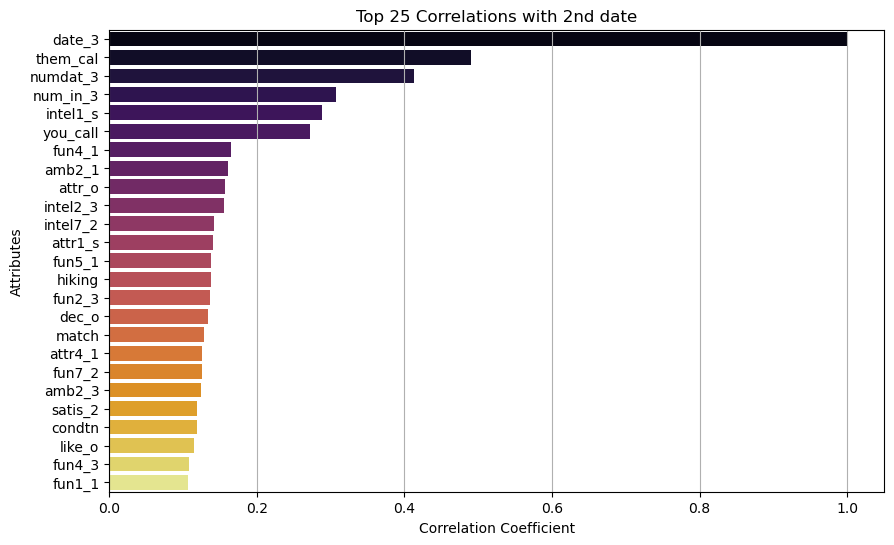

In [114]:
top_corr_date = results_date.sort_values(by="Correlation", ascending=False).head(25)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_date['Correlation'], y=top_corr_date.index, palette='inferno')

plt.title('Top 25 Correlations with 2nd date')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Attributes')
plt.grid(axis='x')

plt.show()

### Shared interests / Hobbies 🎶🎾🏈🎨🎭

In [59]:
tinder_df[[
    'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art',
    'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
    'movies', 'concerts', 'music', 'shopping', 'yoga'
]].isnull().sum() / len(tinder_df)

sports      0.009429
tvsports    0.009429
exercise    0.009429
dining      0.009429
museums     0.009429
art         0.009429
hiking      0.009429
gaming      0.009429
clubbing    0.009429
reading     0.009429
tv          0.009429
theater     0.009429
movies      0.009429
concerts    0.009429
music       0.009429
shopping    0.009429
yoga        0.009429
dtype: float64

In [65]:

shared = pd.concat([unique_individuals['gender'],unique_individuals.loc[:,['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art',
    'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
    'movies', 'concerts', 'music', 'shopping', 'yoga']]],axis = 1)

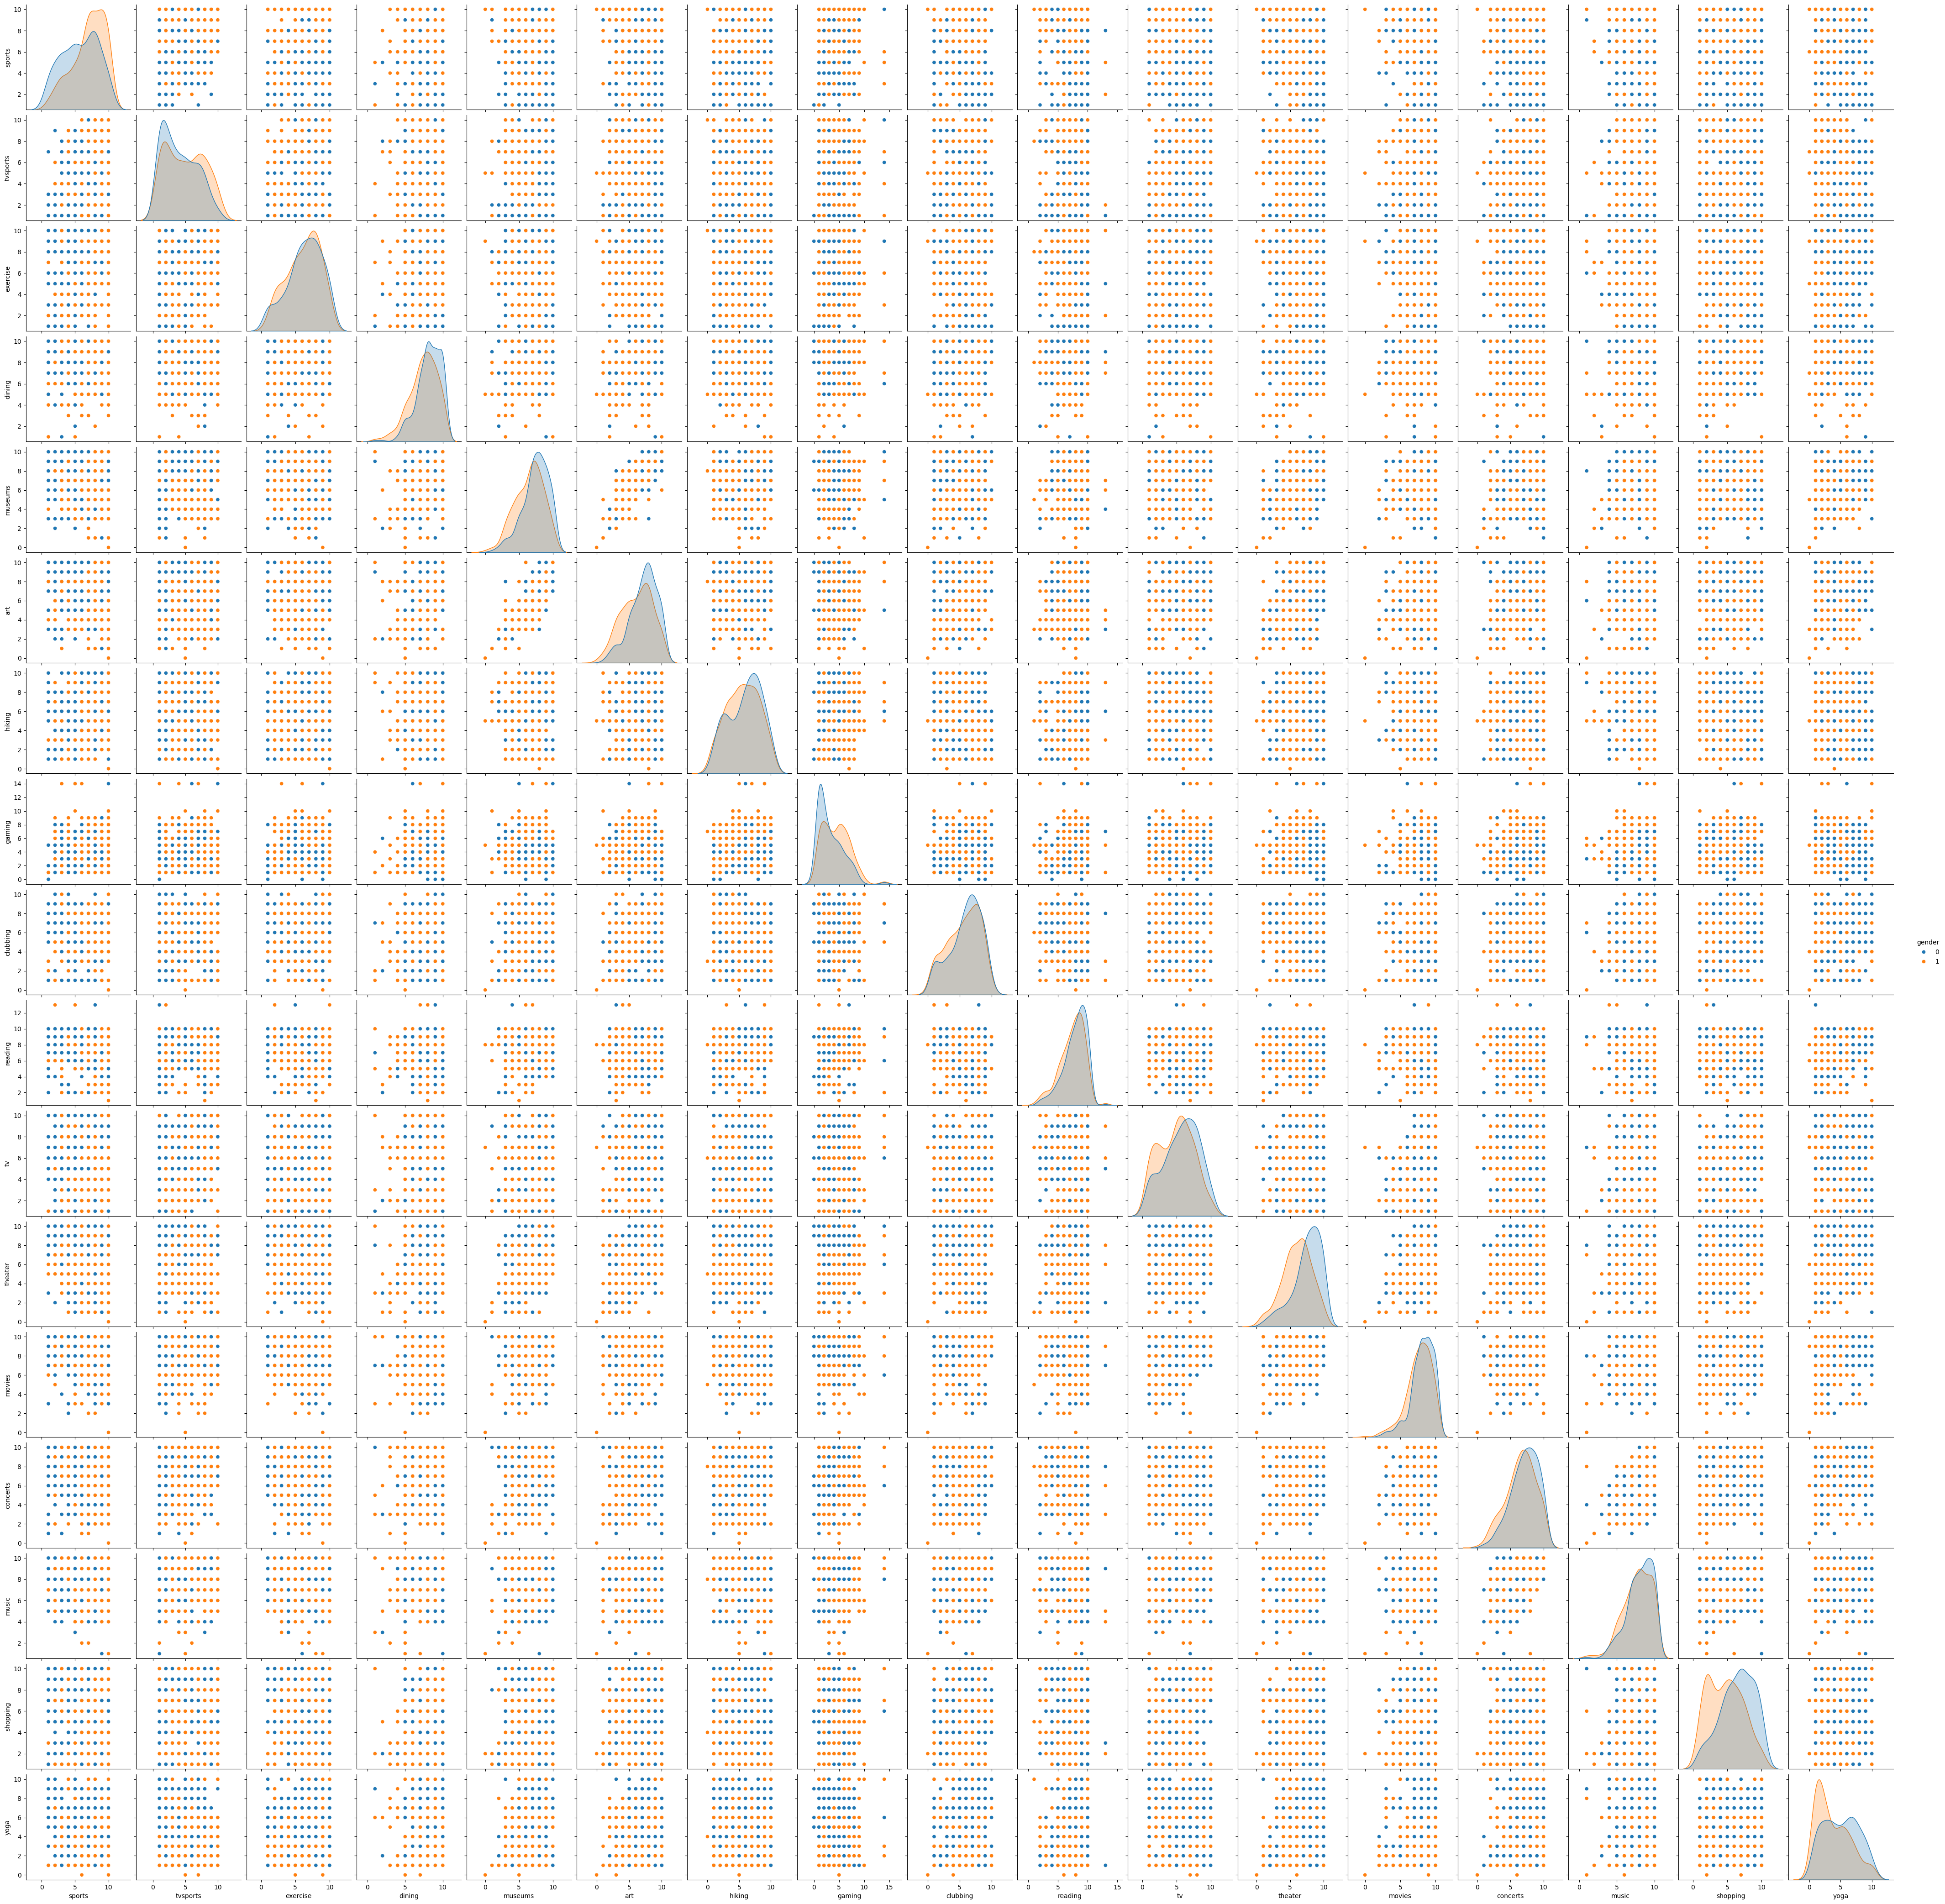

In [67]:
sns.pairplot(shared, hue='gender')

- seems like most shared interests are "common" : Dining, movies, music 

#### Match importance 🔎

In [92]:
tinder_df["date_3"].isnull().sum() / len(tinder_df)

0.5256624492719026

half of data is missing regarding having a second date or not. we'll use it just to have an idea about whether having a match or not can lead to a second date

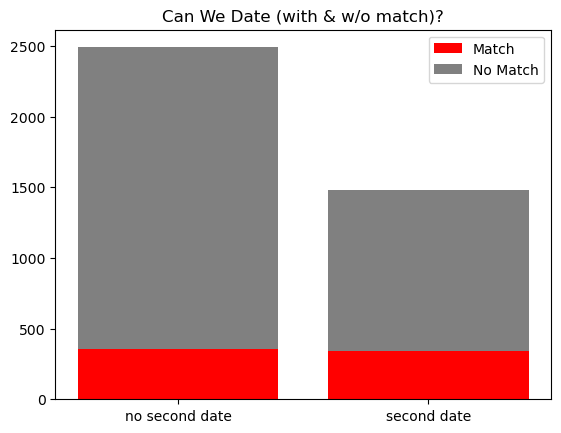

In [103]:
nd_date_match = tinder_df[tinder_df['match'] == 1]['date_3'].value_counts()
nd_date_nomatch = tinder_df[tinder_df['match'] == 0]['date_3'].value_counts()

labels = ["no second date", "second date"]
plt.title("Can We Date (with & w/o match)?")
plt.bar(labels, nd_date_match, label='Match', color= "red")
plt.bar(labels, nd_date_nomatch, bottom=nd_date_match, label='No Match', color= "grey")

plt.legend(['Match', 'No Match'])
plt.show()


- We can note that having a match doesn't assure you to go on a second date. larger propotion on no match went to a second date comparing to those who matched

Conclusion:
- getting a match doesn't mean beguining of relationship. after dating poeple discover a lot more about partner and somtimes change their mind (match or not)
- Beyond the physical aspect, tinder's users shouls rely on more useful info to not only get a match but to go on a dating perspective.
solutions:
- Chaging the forms could be a ground to explore. Man and women share more interests / hobbies than it seems for example. 
- Sending profils that already liked you and getting 
- 